In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [24]:
df = pd.read_csv("Banking Dataset.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,subscribtion
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [25]:
for i in df.columns:
    n = df[df[i] == "unknown"]
    print(f"{i} : {len(n)}")

age : 0
job : 265
marital : 65
education : 1397
default : 6940
housing : 796
loan : 796
contact : 0
month : 0
day_of_week : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
subscribtion : 0


In [26]:
for i in df.columns:
    df[i] = df[i].replace("unknown", df[i].mode()[0])

<h5> pdays = number of days that passed by after the client was last contacted from a previous campaign (999 means client was not
</h5>

In [30]:
df["pdays"].value_counts()

999    31724
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: pdays, dtype: int64

In [34]:
df.drop("pdays",axis=1,inplace=True)

In [41]:
encoder = LabelEncoder()

In [46]:
for i in df.columns:
    if (df[i].dtype == 'O'):
        df[i] = encoder.fit_transform(df[i])

In [47]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,subscribtion
0,49,1,1,2,0,0,0,0,7,4,227,4,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,1,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,0,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,0,1,0
32946,52,9,1,5,0,1,0,0,7,0,64,1,1,0,0
32947,54,0,1,2,0,0,1,0,3,1,131,4,0,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,0,1,0


In [48]:
x = df.drop("subscribtion",axis = 1)
y = df.subscribtion

In [67]:
y.value_counts()

0    29238
1     3712
Name: subscribtion, dtype: int64

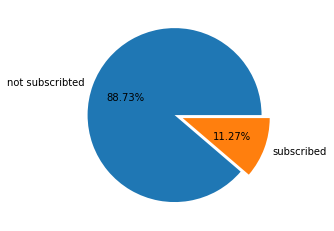

In [75]:
plt.pie(y.value_counts(),labels=["not subscribted", "subscribed"],autopct="%0.2f%%",explode = [0,0.1])
plt.show()

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
model = LogisticRegression(max_iter=100000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [52]:
model.score(x_train,y_train)

0.9023141122913505

In [53]:
model.score(x_test,y_test)

0.9019726858877086

In [54]:
y_predected = model.predict(x_test)
y_predected

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
b = model.predict_proba(x)

In [61]:
no_sub = b[:,0]
yes_sub = b[:,1]

In [65]:
df["no_sub_prob"] = no_sub
df["yes_sub_prob"] = yes_sub

In [66]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,subscribtion,no_sub_prob,yes_sub_prob
0,49,1,1,2,0,0,0,0,7,4,227,4,0,1,0,0.933625,0.066375
1,37,2,1,6,0,0,0,1,7,4,202,2,1,0,0,0.971897,0.028103
2,78,5,1,0,0,0,0,0,3,1,1148,1,0,1,1,0.159731,0.840269
3,36,0,1,6,0,1,0,1,6,1,120,2,0,1,0,0.980106,0.019894
4,59,5,0,6,0,0,0,0,4,3,368,2,0,1,0,0.829716,0.170284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,0,1,0,0.925469,0.074531
32946,52,9,1,5,0,1,0,0,7,0,64,1,1,0,0,0.938736,0.061264
32947,54,0,1,2,0,0,1,0,3,1,131,4,0,1,0,0.957492,0.042508
32948,29,0,1,6,0,0,0,1,6,0,165,1,0,1,0,0.976453,0.023547


In [72]:
model.coef_

array([[ 0.01798623,  0.01590544,  0.24942021,  0.08819916, -0.00547674,
        -0.0284979 , -0.06312375, -1.05173097,  0.01447566,  0.01329238,
         0.00399992, -0.10300159,  0.9857819 ,  1.09253484]])

In [73]:
model.intercept_

array([-5.70980604])